# Training Fashion MNIST model
### Group members

- Priya Gupta - 1911080 
- Omkar Sawant - 1911118 
- Aditya Tawade - 1911126

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.metrics import classification_report
matplotlib.style.use('ggplot')

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"Number of training images: {len(x_train)}")
print(f"Number of test images: {len(x_test)}")

4431872/4422102 [==============================] - 0s 0us/step
Number of training images: 60000
Number of test images: 10000


In [3]:
print(f"Train images dimensions: {x_train.shape}")
print(f"Test images dimensions: {x_test.shape}")

Train images dimensions: (60000, 28, 28)
Test images dimensions: (10000, 28, 28)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

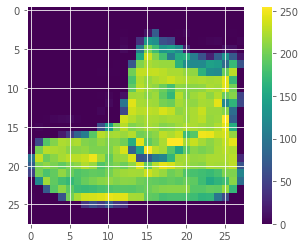

In [5]:
plt.imshow(x_train[0])
plt.colorbar()
# plt.savefig('fashion-mnist-apparel.jpg')
plt.show()

In [6]:
#Scaling images
x_train = x_train / 255.0
x_test = x_test / 255.0

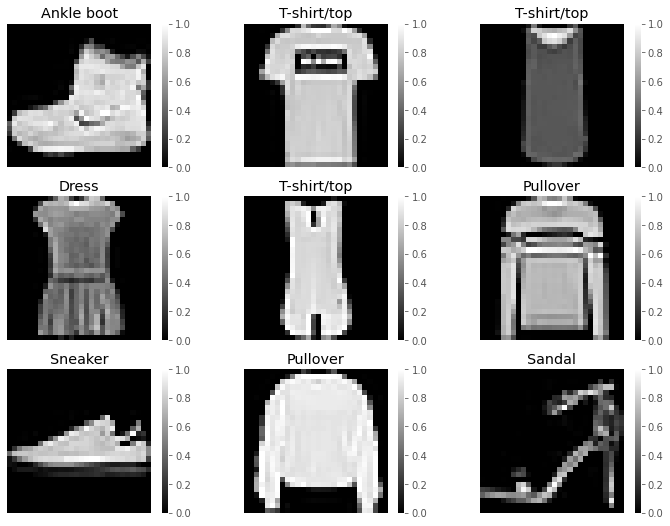

In [7]:
plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray')
    plt.colorbar()
    plt.title(class_names[y_train[i]])
# plt.savefig('fashion-mnist-images-with-labels.jpg')
plt.show()

In [8]:
#building model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4973 - accuracy: 0.8251
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3723 - accuracy: 0.8648
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8767
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8852
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.8923
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8952
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9021
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2560 - accuracy: 0.9049
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9081
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

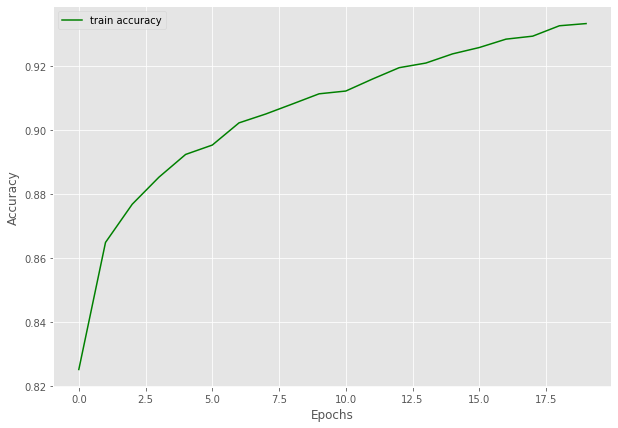

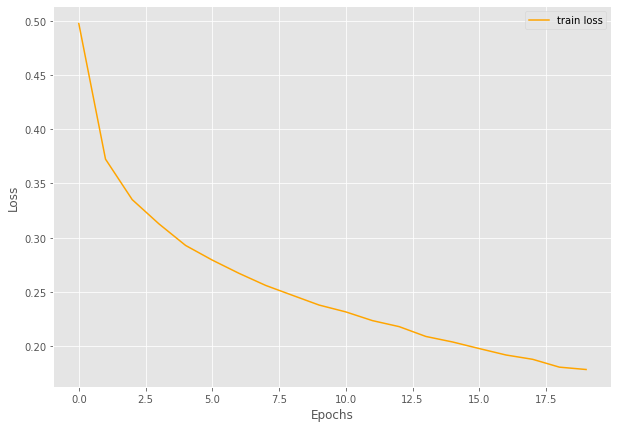

In [11]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
# accuracy plot
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-', 
    label='train accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('fashion-mnist-accuracy.jpg')
plt.show()
# loss plot
plt.figure(figsize=(10, 7))
plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fashion-mnist-loss.jpg')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc*100:.3f}")
print(f"Test loss: {test_loss:.3f}")

313/313 [==============================] - 1s 1ms/step - loss: 0.3572 - accuracy: 0.8893
Test accuracy: 88.930
Test loss: 0.357


In [13]:
predict_x=model.predict(x_test) 
y_pred=np.argmax(predict_x,axis=1)
cls_report = classification_report(y_test, y_pred)
for i in range(len(class_names)):
    print(f"Class {i}: {class_names[i]}")
print(cls_report)

Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.79      0.83      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.77      0.64      0.70      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [14]:
#saving model
model.save('trainedModel.h5')